In [ ]:
 
                            Black Friday Dataset
black-fridayThis dataset comprises of sales transactions captured at a retail store. 
It’s a classic dataset to explore and expand your feature engineering skills and day today understanding from 
multiple shopping experiences. This is a regression problem. 
The dataset has 550,069 rows and 12 columns.

Problem: Predict purchase amount.

In [106]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import seaborn as sns

In [107]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_train =train_data.iloc[:,2:11].values
Y_train = train_data.iloc[:,11].values
X_test = test_data.iloc[:,2:11].values


In [108]:
print(train_data)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
5       1000003  P00193542      M  26-35          15             A   
6       1000004  P00184942      M  46-50           7             B   
7       1000004  P00346142      M  46-50           7             B   
8       1000004   P0097242      M  46-50           7             B   
9       1000005  P00274942      M  26-35          20             A   
10      1000005  P00251242      M  26-35          20             A   
11      1000005  P00014542      M  26-35          20             A   
12      1000005  P00031342      M  26-35          20             A   
13      1000005  P00

In [109]:
print(test_data)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000004  P00128942      M  46-50           7             B   
1       1000009  P00113442      M  26-35          17             C   
2       1000010  P00288442      F  36-45           1             B   
3       1000010  P00145342      F  36-45           1             B   
4       1000011  P00053842      F  26-35           1             C   
5       1000013  P00350442      M  46-50           1             C   
6       1000013  P00155442      M  46-50           1             C   
7       1000013   P0094542      M  46-50           1             C   
8       1000015  P00161842      M  26-35           7             A   
9       1000022  P00067942      M  18-25          15             A   
10      1000026  P00046742      M  26-35           7             B   
11      1000026  P00040042      M  26-35           7             B   
12      1000026  P00196542      M  26-35           7             B   
13      1000026  P00

In [110]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X_train[:, 7:9])
imputert = imputer.fit(X_test[:, 7:9])
X_train[:, 7:9] = imputer.transform(X_train[:, 7:9])
X_test[:, 7:9] = imputer.transform(X_test[:, 7:9])

In [111]:
#Encoding categorical training data 
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X_train[:, 0] = labelencoder_X.fit_transform(X_train[:, 0])
X_train[:, 1] = labelencoder_X.fit_transform(X_train[:, 1])
X_train[:, 3]= labelencoder_X.fit_transform(X_train[:, 3])
X_train[:, 4]= labelencoder_X.fit_transform(X_train[:, 4])

#Encoding categorical testing data 
labelencoder_y = LabelEncoder()
X_test[:, 0] = labelencoder_y.fit_transform(X_test[:, 0])
X_test[:, 1] = labelencoder_y.fit_transform(X_test[:, 1])
X_test[:, 3]= labelencoder_X.fit_transform(X_test[:, 3])
X_test[:, 4]= labelencoder_X.fit_transform(X_test[:, 4])


In [112]:
#calling algo of descisiontreeclassifier
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[19195.1        10596.77380952  8342.32660428 ... 13328.1
 23236.03333333  2463.05714286]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f560bdfe9e8>,
      dtype=object)

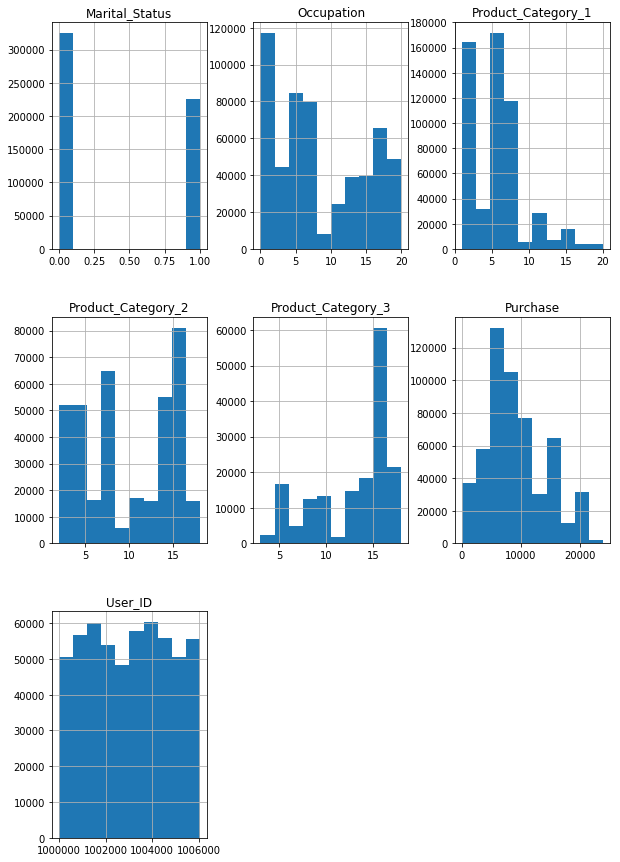

In [114]:
#visualitation of data
plt.rcParams['figure.figsize'] = (10,15)
train_data.hist()

User_ID                  AxesSubplot(0.125,0.125;0.0945122x0.755)
Occupation            AxesSubplot(0.238415,0.125;0.0945122x0.755)
Marital_Status        AxesSubplot(0.351829,0.125;0.0945122x0.755)
Product_Category_1    AxesSubplot(0.465244,0.125;0.0945122x0.755)
Product_Category_2    AxesSubplot(0.578659,0.125;0.0945122x0.755)
Product_Category_3    AxesSubplot(0.692073,0.125;0.0945122x0.755)
Purchase              AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

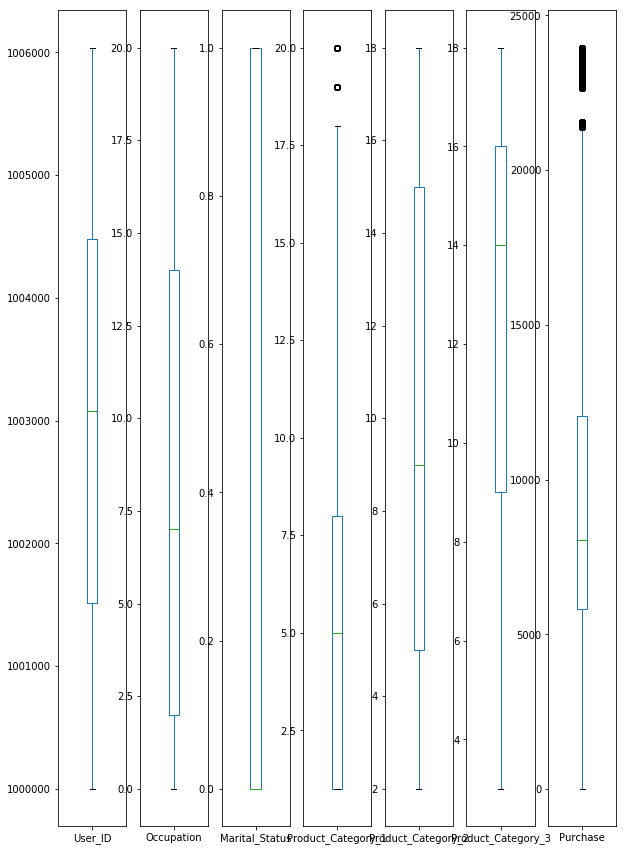

In [115]:
train_data.plot(kind='box', subplots=True, sharex=False, sharey=False)